# Introduction to Regression with Neural Network in TensorFlow

There are many definition for a regression problem but in our case, we're going to simplfy it: prediction a numerical variable based on combination of other variables. Even shorter, predicting a number...

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

2.12.0


## Creating data to view and fit

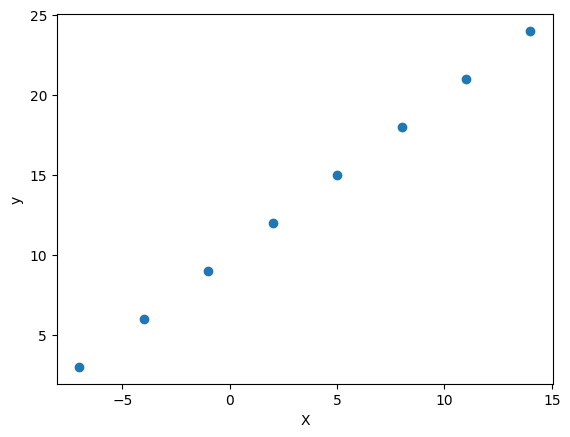

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize features and labels
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Let's check the input and output shape (Note that these shapes are not correct one)
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
# Let's check another input and output shape (Note that these shapes are not correct one)
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

As you see above, it seems our inputs and outputs have no shape. Let's turn numpy arrays to tensors for finding correct shape.

In [ ]:
# Turn numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Check tensor shapes
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow

1. **Creating a model** - define input and output layer, as well as the hidden layers of deep learning model.
2. **Compiling  a model** - define the loss function (in other words, the function which tells our model how wrong it is) and optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performanse of our model)
3. **Fitting a model** - letting the model try to find patterns features and labels

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 340ms/step - loss: 9.8632 - mae: 9.8632
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 9.7307 - mae: 9.7307
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 9.5982 - mae: 9.5982
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 9.4657 - mae: 9.4657
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 9.3332 - mae: 9.3332


In [ ]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try to make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[20.689644]], dtype=float32)

Our expection for 17.0 is 20.68 but model prediction is -23.68. This is so bad prediction.

## Improving Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - Here we might add more layers, increase the number of hidden units (called neuron) within each of the hidden layers, change the activation function of each layer
2. **Compiling a model** - Here we might change the optimization function or perhaps the learning rate of the optimization function
3. **Fitting a model** - Here we might change the number of epoch (leave it training for longer) or more data (give the model more example to learn from)

### Increasing number of epoch

In [ ]:
# Let's rebuild model (increasing number of epoch)

# 1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compiling a model
model.compile(
    loss=tf.keras.losses.mae, # mae short for mean absolute error
    optimizer=tf.keras.optimizers.SGD(), # SGD short for stochastic gradient descent
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 323ms/step - loss: 13.3409 - mae: 13.3409
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2084 - mae: 13.2084
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0759 - mae: 13.0759
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.9434 - mae: 12.9434
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 12.8109 - mae: 12.8109
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 12.6784 - mae: 12.6784
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 12.5459 - mae: 12.5459
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.4134 - mae: 12.4134
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 12.2809 - mae: 12.2809
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 12.1484 - mae: 12.1484
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
# Remind X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Let's make a new prediction
model.predict([17.0])

1/1 [==============================] - 0s 66ms/step


array([[29.60528]], dtype=float32)

Our expection is 27 and model prediction is 29.60. This is better and close than before.

### Adding more hidden layers with 100 neuron

In [ ]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 835ms/step - loss: 13.6388 - mae: 13.6388
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 12.9795 - mae: 12.9795
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 12.3783 - mae: 12.3783
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.8217 - mae: 11.8217
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2377 - mae: 11.2377
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5454 - mae: 10.5454
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.6637 - mae: 9.6637
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.5641 - mae: 8.5641
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.1431 - mae: 7.1431
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 5.2338 - mae: 5.2338
Epoch 11/100
1/1 [==============================] - 0s 9

In [ ]:
# Let's remind our data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[33.03018]], dtype=float32)

This prediction is worse than before. The model may have been overfitting.

### Change the optimization function

Our optimization function is Stochastic Gradient Descent, let's make it Adam and see what will happen.

In [ ]:
# Let's rebuild model

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compiling model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5813 - mae: 13.5813
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.1610 - mae: 13.1610
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7825 - mae: 12.7825
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 12.4126 - mae: 12.4126
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.0682 - mae: 12.0682
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7311 - mae: 11.7311
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3921 - mae: 11.3921
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0480 - mae: 11.0480
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 10.6959 - mae: 10.6959
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3262 - mae: 10.3262
Epoch 11/100
1/1 [==============================] -

In [ ]:
# Remind data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Making a prediction
model.predict([17.0])

1/1 [==============================] - 0s 91ms/step


array([[31.864826]], dtype=float32)